Anillo 2D

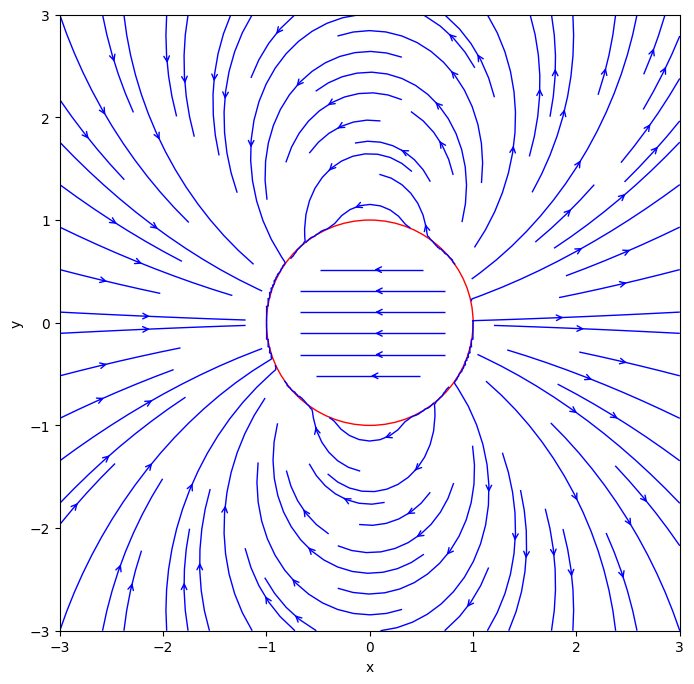

In [1]:
# Anillo con Corriente en 2D

import numpy as np
import matplotlib.pyplot as plt

#  Constantes
A = 1.0  
R = 1.0  # Radio del anillo con corriente

# Meshgrid de los puntos
x, y = np.meshgrid(np.linspace(-3, 3, 400), np.linspace(-3, 3, 400))

# Conversión a polares
r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)

# Definimos los componentes del campo magnético dentro del anillo
B_r_in = - A * np.cos(theta)
B_theta_in = A * np.sin(theta)
B_x_in = B_r_in * np.cos(theta) - B_theta_in * np.sin(theta)
B_y_in = B_r_in * np.sin(theta) + B_theta_in * np.cos(theta)

#Definimos los componentes del campo magnético fuera del anillo
B_r_out = (2 * A * R**3 / r**3) * np.cos(theta)
B_theta_out = (A * R**3 / r**3) * np.sin(theta)
B_theta_out = (A * R**3 / r**3) * np.sin(theta)
B_x_out = B_r_out * np.cos(theta) - B_theta_out * np.sin(theta)
B_y_out = B_r_out * np.sin(theta) + B_theta_out * np.cos(theta)

# Mask de las regiones
B_x = np.where(r < R, B_x_in, B_x_out)
B_y = np.where(r < R, B_y_in, B_y_out)

# Graficamos las líneas de campo magnético
fig, ax = plt.subplots(figsize=(8, 8))
ax.streamplot(x, y, B_x, B_y, color='blue', linewidth=1, density=1, arrowstyle='->')

# Agregamos el anillo de corriente
circle = plt.Circle((0, 0), R, color='red', fill=False)
ax.add_artist(circle)

# Detalles de la gráfica
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xlabel('x')
ax.set_ylabel('y')

# Mostramos
plt.show()


Anillo 3D

In [2]:
# Anillo con Corriente en 3D
# Solo líneas de campo

import numpy as np
import mayavi
import PyQt5
from mayavi import mlab

# Campo magnético dentro del anillo de corriente
def B_inside_loop(r, A):
    x, y, z = r[:, 0], r[:, 1], r[:, 2]
    theta = np.arctan2(y, x)
    
    Bx = A * np.cos(theta)
    By = -A * np.sin(theta)
    Bz = np.zeros_like(z)
    
    B = np.stack((Bx, By, Bz), axis=-1)
    return B

# Campo magnético afuera del anillo de corriente
def B_outside_loop(r, A, R):
    x, y, z = r[:, 0], r[:, 1], r[:, 2]
    r_mag = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arctan2(y, x)
    
    Br = -2 * A * R**3 * np.cos(theta) / r_mag**3
    Btheta = -A * R**3 * np.sin(theta) / r_mag**3
    
    Bx = Br
    By = Btheta
    Bz = np.zeros_like(z)
    
    B = np.stack((Bx, By, Bz), axis=-1)
    return B

# Constantes
R = 0.1  # Radio del anillo
A = 1.0  

# Definimos el grid de puntos
X, Y, Z = np.mgrid[-0.2:0.2:11j, -0.2:0.2:11j, -0.2:0.2:11j]

r = np.c_[np.ravel(X), np.ravel(Y), np.ravel(Z)]

# Incializamos el array para el campo magnético
B = np.zeros_like(r)

# Calculamos el campo magnético
inside_mask = np.sqrt(np.sum(r[:, :2]**2, axis=1)) <= R
outside_mask = ~inside_mask

B[inside_mask] = B_inside_loop(r[inside_mask], A)
B[outside_mask] = B_outside_loop(r[outside_mask], A, R)

# Visualización
Bx, By, Bz = B[:, 0].reshape(X.shape), B[:, 1].reshape(Y.shape), B[:, 2].reshape(Z.shape)

mlab.figure(size=(800, 800), bgcolor=(1, 1, 1))
mlab.quiver3d(X, Y, Z, Bx, By, Bz, scale_factor=0.1, line_width=2, color=(0, 0, 1))
mlab.title('Campo Magnético de Anillo con Corriente', size=0.5)

mlab.show()


2024-06-12 13:16:55.971 Python[67839:3684597] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


In [ ]:
# Anillo con Corriente en 3D
# Líneas y anillo

import numpy as np
import mayavi
import PyQt5
from mayavi import mlab

# Vectores normales
def base_vectors(n):
    n = n / np.linalg.norm(n)
    if abs(n[0]) == 1:
        l = np.array([n[2], 0, -n[0]])
    else:
        l = np.array([0, n[2], -n[1]])
    l = l / np.linalg.norm(l)
    m = np.cross(n, l)
    return n, l, m

# Campo magnético dentro del anillo de corriente
def B_inside_loop(r, R, A, current_direction):
    x, y, z = r[:, 0], r[:, 1], r[:, 2]
    r_mag = np.sqrt(x**2 + y**2 + z**2)
    
    Bx = np.zeros_like(x)
    By = np.zeros_like(y)
    Bz = np.zeros_like(z)

    if current_direction == "z":
        By = A * R**2 / (2 * (R**2 + z**2)**(3/2)) * x
        Bx = -A * R**2 / (2 * (R**2 + z**2)**(3/2)) * y
    elif current_direction == "x":
        Bz = A * R**2 / (2 * (R**2 + y**2)**(3/2)) * x
        By = -A * R**2 / (2 * (R**2 + y**2)**(3/2)) * z
    elif current_direction == "y":
        Bx = A * R**2 / (2 * (R**2 + z**2)**(3/2)) * y
        Bz = -A * R**2 / (2 * (R**2 + z**2)**(3/2)) * x

    B = np.stack((Bx, By, Bz), axis=-1)
    return B

# Campo magnético afuera del anillo de corriente
def B_outside_loop(r, R, A):
    x, y, z = r[:, 0], r[:, 1], r[:, 2]
    r_mag = np.sqrt(x**2 + y**2 + z**2)
    
    Br = -2 * A * R**3 * x / r_mag**3
    Btheta = -A * R**3 * y / r_mag**3
    
    Bx = Br
    By = Btheta
    Bz = np.zeros_like(z)
    
    B = np.stack((Bx, By, Bz), axis=-1)
    return B

# Constantes
R = 0.1  # Radio del anillo
A = 1.0 
current_direction = "z"  # Dirección del anillo de corriente ("x", "y", or "z")

# Definimos el grid de puntos
X, Y, Z = np.mgrid[-0.2:0.2:21j, -0.2:0.2:21j, -0.2:0.2:21j]

r = np.c_[np.ravel(X), np.ravel(Y), np.ravel(Z)]

# Incializamos el array para el campo magnético
B = np.zeros_like(r)

# Calculamos el campo magnético
inside_mask = np.sqrt(np.sum(r[:, :2]**2, axis=1)) <= R
outside_mask = ~inside_mask

B[inside_mask] = B_inside_loop(r[inside_mask], R, A, current_direction)
B[outside_mask] = B_outside_loop(r[outside_mask], R, A)

# Visualización
Bx, By, Bz = B[:, 0].reshape(X.shape), B[:, 1].reshape(Y.shape), B[:, 2].reshape(Z.shape)
B_norm = np.sqrt(Bx**2 + By**2 + Bz**2)

mlab.figure(size=(800, 800), bgcolor=(1, 1, 1))
mlab.quiver3d(X, Y, Z, Bx, By, Bz, scale_factor=0.1, line_width=2, color=(0, 0, 1))
mlab.contour3d(X, Y, Z, B_norm, contours=10, transparent=True, opacity=0.5)
mlab.title('Campo Magnético de Anillo con Corriente', size=0.5)

mlab.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Magnetic field inside the current loop
def B_inside_loop(r, A):
    x, y, z = r[:, 0], r[:, 1], r[:, 2]
    theta = np.arctan2(y, x)
    
    Bx = A * np.cos(theta)
    By = -A * np.sin(theta)
    Bz = np.zeros_like(z)
    
    B = np.stack((Bx, By, Bz), axis=-1)
    return B

# Magnetic field outside the current loop
def B_outside_loop(r, A, R):
    x, y, z = r[:, 0], r[:, 1], r[:, 2]
    r_mag = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arctan2(y, x)
    
    Br = -2 * A * R**3 * np.cos(theta) / r_mag**3
    Btheta = -A * R**3 * np.sin(theta) / r_mag**3
    
    Bx = Br
    By = Btheta
    Bz = np.zeros_like(z)
    
    B = np.stack((Bx, By, Bz), axis=-1)
    return B

# Constants
R = 0.1  # Radius of the loop
A = 1.0  

# Define the grid of points
X, Y, Z = np.mgrid[-0.2:0.2:5j, -0.2:0.2:5j, -0.2:0.2:5j]  # Reduced grid size for testing

r = np.c_[np.ravel(X), np.ravel(Y), np.ravel(Z)]

# Initialize the array for the magnetic field
B = np.zeros_like(r)

# Calculate the magnetic field
inside_mask = np.sqrt(np.sum(r[:, :2]**2, axis=1)) <= R
outside_mask = ~inside_mask

B[inside_mask] = B_inside_loop(r[inside_mask], A)
B[outside_mask] = B_outside_loop(r[outside_mask], A, R)

# Visualization
Bx, By, Bz = B[:, 0].reshape(X.shape), B[:, 1].reshape(Y.shape), B[:, 2].reshape(Z.shape)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the magnetic field vectors
ax.quiver(X, Y, Z, Bx, By, Bz, length=0.05, normalize=True)

ax.set_title('Campo Magnético de Anillo con Corriente')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


im gonna end it

![kys](kys.jpg)

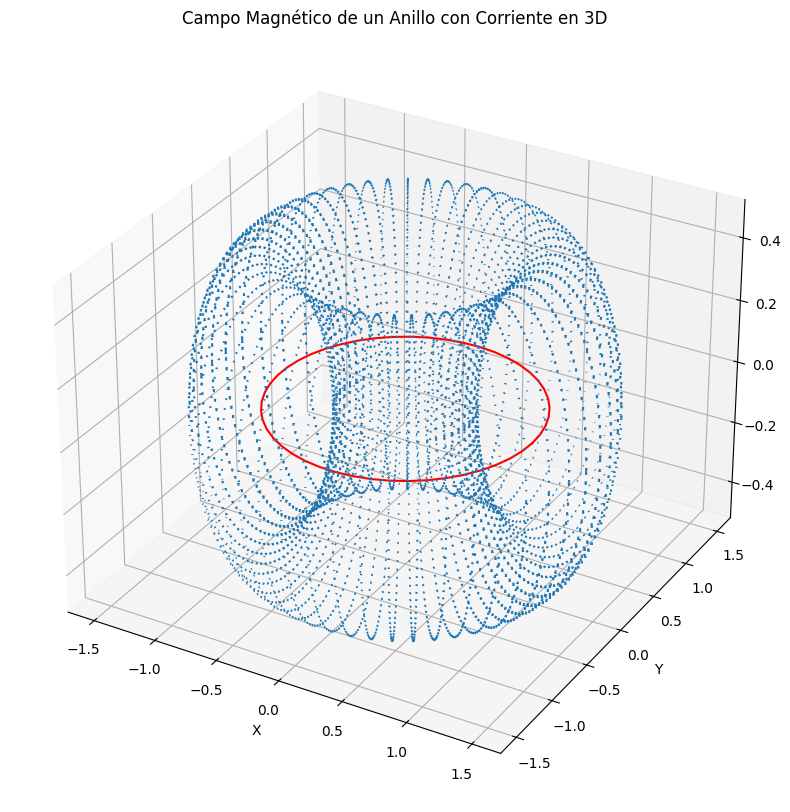

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros
A = 1   # Constante del campo magnético
R = 1   # Radio del anillo

# Crear una malla de puntos en coordenadas esféricas
theta = np.linspace(0, np.pi, 50)  # Ángulo polar
phi = np.linspace(0, 2*np.pi, 50)        # Ángulo azimutal
theta, phi = np.meshgrid(theta, phi)

# Coordenadas cartesianas
x = (R + 0.5 * np.cos(theta)) * np.sin(phi)
y = (R + 0.5 * np.cos(theta)) * np.cos(phi)
z = 0.5 * np.sin(theta)

# Componentes del campo magnético
Bx = A * np.cos(phi) * np.sin(theta) - 2 * A * R**3 * np.cos(phi) * np.cos(theta) / (R**2 + 1)
By = A * np.cos(phi) * np.cos(theta) + 2 * A * R**3 * np.cos(phi) * np.sin(theta) / (R**2 + 1)
Bz = A * np.sin(phi) - A * R**3 * np.sin(phi) / (R**2 + 1)

# Duplicar vectores con signo negativo en Z
x = np.concatenate((x, x))
y = np.concatenate((y, y))
z = np.concatenate((z, -z))
Bx = np.concatenate((Bx, Bx))
By = np.concatenate((By, By))
Bz = np.concatenate((Bz, -Bz))

# Graficar el campo magnético
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(x, y, z, Bx, By, Bz, length=0.01, normalize=True)

# Visualizar el anillo
theta_circle = np.linspace(0, 2*np.pi, 50)
x_circle = R * np.cos(theta_circle)
y_circle = R * np.sin(theta_circle)
z_circle = np.zeros_like(x_circle)
ax.plot(x_circle, y_circle, z_circle, color='red')

# Configurar la gráfica
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Campo Magnético de un Anillo con Corriente en 3D')
plt.show()

In [11]:
import numpy as np
import mayavi
import PyQt5
from mayavi import mlab

# Parámetros
A = 1   # Constante del campo magnético
R = 1   # Radio del anillo

# Crear una malla de puntos en coordenadas esféricas
theta = np.linspace(0, np.pi, 50)  # Ángulo polar
phi = np.linspace(0, 2*np.pi, 50)        # Ángulo azimutal
theta, phi = np.meshgrid(theta, phi)

# Coordenadas cartesianas
x = (R + 0.5 * np.cos(theta)) * np.sin(phi)
y = (R + 0.5 * np.cos(theta)) * np.cos(phi)
z = 0.5 * np.sin(theta)

# Componentes del campo magnético
Bx = A * np.cos(phi) * np.sin(theta) - 2 * A * R**3 * np.cos(phi) * np.cos(theta) / (R**2 + 1)
By = A * np.cos(phi) * np.cos(theta) + 2 * A * R**3 * np.cos(phi) * np.sin(theta) / (R**2 + 1)
Bz = A * np.sin(phi) - A * R**3 * np.sin(phi) / (R**2 + 1)

# Duplicar vectores con signo negativo en Z
x = np.concatenate((x, x))
y = np.concatenate((y, y))
z = np.concatenate((z, -z))
Bx = np.concatenate((Bx, Bx))
By = np.concatenate((By, By))
Bz = np.concatenate((Bz, -Bz))

# Graficar el campo magnético usando Mayavi
mlab.figure(size=(800, 800), bgcolor=(1, 1, 1))
mlab.quiver3d(x, y, z, Bx, By, Bz, scale_factor=0.1, color=(0, 0, 1))

# Visualizar el anillo
theta_circle = np.linspace(0, 2*np.pi, 50)
x_circle = R * np.cos(theta_circle)
y_circle = R * np.sin(theta_circle)
z_circle = np.zeros_like(x_circle)
mlab.plot3d(x_circle, y_circle, z_circle, color=(1, 0, 0), tube_radius=0.02)

# Configurar la gráfica
mlab.title('Campo Magnético de un Anillo con Corriente en 3D', color=(0, 0, 0))

# Configurar los ejes con etiquetas negras
axes = mlab.axes(color=(0, 0, 0), xlabel='X', ylabel='Y', zlabel='Z')
axes.label_text_property.color = (0, 0, 0)
axes.title_text_property.color = (0, 0, 0)

mlab.show()

In [13]:
# Con colorcitos en los vectores
# 
# 
import numpy as np
from mayavi import mlab

# Parámetros
A = 1   # Constante del campo magnético
R = 1   # Radio del anillo

# Crear una malla de puntos en coordenadas esféricas
theta = np.linspace(0, np.pi, 50)  # Ángulo polar
phi = np.linspace(0, 2*np.pi, 50)  # Ángulo azimutal
theta, phi = np.meshgrid(theta, phi)

# Coordenadas cartesianas
x = (R + 0.5 * np.cos(theta)) * np.sin(phi)
y = (R + 0.5 * np.cos(theta)) * np.cos(phi)
z = 0.5 * np.sin(theta)

# Componentes del campo magnético
Bx = A * np.cos(phi) * np.sin(theta) - 2 * A * R**3 * np.cos(phi) * np.cos(theta) / (R**2 + 1)
By = A * np.cos(phi) * np.cos(theta) + 2 * A * R**3 * np.cos(phi) * np.sin(theta) / (R**2 + 1)
Bz = A * np.sin(phi) - A * R**3 * np.sin(phi) / (R**2 + 1)

# Duplicar vectores con signo negativo en Z
x = np.concatenate((x, x))
y = np.concatenate((y, y))
z = np.concatenate((z, -z))
Bx = np.concatenate((Bx, Bx))
By = np.concatenate((By, By))
Bz = np.concatenate((Bz, -Bz))

# Calcular la magnitud de los vectores
B_magnitude = np.sqrt(Bx**2 + By**2 + Bz**2)

# Graficar el campo magnético usando Mayavi con color basado en la magnitud del vector
mlab.figure(size=(800, 800), bgcolor=(1, 1, 1))
quiver = mlab.quiver3d(x, y, z, Bx, By, Bz, scalars=B_magnitude, scale_factor=0.1)
quiver.glyph.color_mode = 'color_by_scalar'

# Visualizar el anillo
theta_circle = np.linspace(0, 2*np.pi, 50)
x_circle = R * np.cos(theta_circle)
y_circle = R * np.sin(theta_circle)
z_circle = np.zeros_like(x_circle)
mlab.plot3d(x_circle, y_circle, z_circle, color=(1, 0, 0), tube_radius=0.02)

# Configurar la gráfica
mlab.title('Campo Magnético de un Anillo con Corriente en 3D', color=(0, 0, 0))

# Configurar los ejes con etiquetas negras
axes = mlab.axes(color=(0, 0, 0), xlabel='X', ylabel='Y', zlabel='Z')
axes.label_text_property.color = (0, 0, 0)
axes.title_text_property.color = (0, 0, 0)

mlab.show()


Corrección de vectores unitarios

In [15]:
#Vectores unitarios corregidos

import numpy as np
from mayavi import mlab

# Parámetros
A = 1   # Constante del campo magnético
R = 1   # Radio del anillo

# Crear una malla de puntos en coordenadas esféricas
theta = np.linspace(0, np.pi, 40)  # Ángulo polar 
phi = np.linspace(0, 2*np.pi, 40)  # Ángulo azimutal 
theta, phi = np.meshgrid(theta, phi)

# Coordenadas cartesianas
x = (R + 0.5 * np.cos(theta)) * np.sin(phi)
y = (R + 0.5 * np.cos(theta)) * np.cos(phi)
z = 0.5 * np.sin(theta)

# Definición de los vectores unitarios
r_hat = np.array([np.cos(theta) * np.sin(phi), np.sin(theta) * np.sin(phi), np.cos(phi)])
theta_hat = np.array([-np.sin(theta), np.cos(theta), np.zeros_like(theta)])
phi_hat = np.array([np.cos(theta) * np.cos(phi), np.sin(theta) * np.cos(phi), -np.sin(phi)])

# Componentes del campo magnético usando vectores unitarios
Bx = A * np.cos(phi) * np.sin(theta) - 2 * A * R**3 * np.cos(phi) * np.cos(theta) / (R**2 + 1)
By = A * np.cos(phi) * np.cos(theta) + 2 * A * R**3 * np.cos(phi) * np.sin(theta) / (R**2 + 1)
Bz = A * np.sin(phi) - A * R**3 * np.sin(phi) / (R**2 + 1)

# Duplicar vectores con signo negativo en Z
x = np.concatenate((x, x))
y = np.concatenate((y, y))
z = np.concatenate((z, -z))
Bx = np.concatenate((Bx, Bx))
By = np.concatenate((By, By))
Bz = np.concatenate((Bz, -Bz))

# Calcular la magnitud de los vectores
B_magnitude = np.sqrt(Bx**2 + By**2 + Bz**2)

# Graficar el campo magnético usando Mayavi con color basado en la magnitud del vector
mlab.figure(size=(800, 800), bgcolor=(1, 1, 1))
quiver = mlab.quiver3d(x, y, z, Bx, By, Bz, scalars=B_magnitude, scale_factor=0.1)
quiver.glyph.color_mode = 'color_by_scalar'

# Visualizar el anillo
theta_circle = np.linspace(0, 2*np.pi, 50)
x_circle = R * np.cos(theta_circle)
y_circle = R * np.sin(theta_circle)
z_circle = np.zeros_like(x_circle)
mlab.plot3d(x_circle, y_circle, z_circle, color=(1, 0, 0), tube_radius=0.02)

# Configurar la gráfica
mlab.title('Campo Magnético de un Anillo con Corriente en 3D', color=(0, 0, 0))

# Configurar los ejes con etiquetas negras
axes = mlab.axes(color=(0, 0, 0), xlabel='X', ylabel='Y', zlabel='Z')
axes.label_text_property.color = (0, 0, 0)
axes.title_text_property.color = (0, 0, 0)

mlab.show()


In [17]:
import numpy as np
from mayavi import mlab

# Parámetros
A = 1   # Constante del campo magnético
R = 1   # Radio del anillo

# Crear una malla de puntos en coordenadas esféricas
theta = np.linspace(0, np.pi, 40)  # Ángulo polar 
phi = np.linspace(0, 2*np.pi, 40)  # Ángulo azimutal 
theta, phi = np.meshgrid(theta, phi)

# Coordenadas cartesianas
x = (R + 0.5 * np.cos(theta)) * np.sin(phi)
y = (R + 0.5 * np.cos(theta)) * np.cos(phi)
z = 0.5 * np.sin(theta)

# Definición de los vectores unitarios
r_hat = np.array([np.cos(theta) * np.sin(phi), np.sin(theta) * np.sin(phi), np.cos(phi)])
theta_hat = np.array([-np.sin(theta), np.cos(theta), np.zeros_like(theta)])
phi_hat = np.array([np.cos(theta) * np.cos(phi), np.sin(theta) * np.cos(phi), -np.sin(phi)])

# Componentes del campo magnético usando vectores unitarios
Bx = A * np.cos(phi) * np.sin(theta) - 2 * A * R**3 * np.cos(phi) * np.cos(theta) / (R**2 + 1)
By = A * np.cos(phi) * np.cos(theta) + 2 * A * R**3 * np.cos(phi) * np.sin(theta) / (R**2 + 1)
Bz = A * np.sin(phi) - A * R**3 * np.sin(phi) / (R**2 + 1)

# Duplicar vectores con signo negativo en Z
x = np.concatenate((x, x))
y = np.concatenate((y, y))
z = np.concatenate((z, -z))
Bx = np.concatenate((Bx, Bx))
By = np.concatenate((By, By))
Bz = np.concatenate((Bz, -Bz))

# Calcular la magnitud de los vectores
B_magnitude = np.sqrt(Bx**2 + By**2 + Bz**2)

# Graficar el campo magnético usando Mayavi con color basado en la magnitud del vector
mlab.figure(size=(800, 800), bgcolor=(1, 1, 1))
quiver = mlab.quiver3d(x, y, z, Bx, By, Bz, scalars=B_magnitude, scale_factor=0.1)
quiver.glyph.color_mode = 'color_by_scalar'

# Visualizar el anillo
theta_circle = np.linspace(0, 2*np.pi, 50)
x_circle = R * np.cos(theta_circle)
y_circle = R * np.sin(theta_circle)
z_circle = np.zeros_like(x_circle)
mlab.plot3d(x_circle, y_circle, z_circle, color=(1, 0, 0), tube_radius=0.02)

# Configurar la gráfica
mlab.title('Campo Magnético de un Anillo con Corriente en 3D', color=(0, 0, 0))

# Configurar los ejes con etiquetas negras
axes = mlab.axes(color=(0, 0, 0), xlabel='X', ylabel='Y', zlabel='Z')
axes.label_text_property.color = (0, 0, 0)
axes.title_text_property.color = (0, 0, 0)

mlab.show()


In [26]:
import numpy as np
import mayavi
import PyQt5
from mayavi import mlab

# Parámetros
A = 1   # Constante del campo magnético
R = 1   # Radio del anillo

# Crear una malla de puntos en coordenadas esféricas
theta = np.linspace(0, np.pi, 20)  # Ángulo polar (menos puntos para mejor visibilidad)
phi = np.linspace(0, 2*np.pi, 20)  # Ángulo azimutal (menos puntos para mejor visibilidad)

"""r_in = R * np.linspace(0.5, 1, 10) # Radio dentro del anillo
r_out = R * np.linspace(1, 2, 10)  # Radio fuera del anillo"""

r_mesh = R * np.linspace(0.5, 2, 20)  # Radio para todo el espacio

"""# Crear malla para región interna y externa
theta_in, phi_in, r_in = np.meshgrid(theta, phi, r_in)
theta_out, phi_out, r_out = np.meshgrid(theta, phi, r_out)"""

# Crear malla mejor para todo el espacio
theta_mesh, phi_mesh, r_mesh = np.meshgrid(theta, phi, r_mesh)

"""# Coordenadas cartesianas para región interna
x_in = r_in * np.sin(theta_in) * np.cos(phi_in)
y_in = r_in * np.sin(theta_in) * np.sin(phi_in)
z_in = r_in * np.cos(theta_in)

# Coordenadas cartesianas para región externa
x_out = r_out * np.sin(theta_out) * np.cos(phi_out)
y_out = r_out * np.sin(theta_out) * np.sin(phi_out)
z_out = r_out * np.cos(theta_out)"""

# Coordenadas cartesianas para todo el espacio
x = r_mesh * np.sin(theta_mesh) * np.cos(phi_mesh)
y = r_mesh * np.sin(theta_mesh) * np.sin(phi_mesh)
z = r_mesh * np.cos(theta_mesh)

"""# Definición de los vectores unitarios para la región interna
r_hat_in = np.array([np.sin(theta_in) * np.cos(phi_in), np.sin(theta_in) * np.sin(phi_in), np.cos(theta_in)])
theta_hat_in = np.array([np.cos(theta_in) * np.cos(phi_in), np.cos(theta_in) * np.sin(phi_in), -np.sin(theta_in)])

# Definición de los vectores unitarios para la región externa
r_hat_out = np.array([np.sin(theta_out) * np.cos(phi_out), np.sin(theta_out) * np.sin(phi_out), np.cos(theta_out)])
theta_hat_out = np.array([np.cos(theta_out) * np.cos(phi_out), np.cos(theta_out) * np.sin(phi_out), -np.sin(theta_out)])"""

# Definición de los vectores unitarios para todo el espacio
r_hat = np.array([np.sin(theta_mesh) * np.cos(phi_mesh), np.sin(theta_mesh) * np.sin(phi_mesh), np.cos(theta_mesh)])
theta_hat = np.array([np.cos(theta_mesh) * np.cos(phi_mesh), np.cos(theta_mesh) * np.sin(phi_mesh), -np.sin(theta_mesh)])

"""# Componentes del campo magnético en la región interna usando los vectores unitarios
Br_in = -A * np.cos(theta_in)
Btheta_in = A * np.sin(theta_in)
Bx_in = Br_in * r_hat_in[0] + Btheta_in * theta_hat_in[0]
By_in = Br_in * r_hat_in[1] + Btheta_in * theta_hat_in[1]
Bz_in = Br_in * r_hat_in[2] + Btheta_in * theta_hat_in[2]

# Componentes del campo magnético en la región externa usando los vectores unitarios
Br_out = (2 * A * R**3 / r_out**3) * np.cos(theta_out)
Btheta_out = (A * R**3 / r_out**3) * np.sin(theta_out)
Bx_out = Br_out * r_hat_out[0] + Btheta_out * theta_hat_out[0]
By_out = Br_out * r_hat_out[1] + Btheta_out * theta_hat_out[1]
Bz_out = Br_out * r_hat_out[2] + Btheta_out * theta_hat_out[2]"""

if R < 0.5:
    # Componentes del campo magnético en la región interna usando los vectores unitarios
    Br_in = -A * np.cos(theta_mesh)
    Btheta_in = A * np.sin(theta_mesh)
    Bx_in = Br_in * r_hat[0] + Btheta_in * theta_hat[0]
    By_in = Br_in * r_hat[1] + Btheta_in * theta_hat[1]
    Bz_in = Br_in * r_hat[2] + Btheta_in * theta_hat[2]
else:
    # Componentes del campo magnético en la región externa usando los vectores unitarios
    Br_out = (2 * A * R**3 / r_mesh**3) * np.cos(theta_mesh)
    Btheta_out = (A * R**3 / r_mesh**3) * np.sin(theta_mesh)
    Bx_out = Br_out * r_hat[0] + Btheta_out * theta_hat[0]
    By_out = Br_out * r_hat[1] + Btheta_out * theta_hat[1]
    Bz_out = Br_out * r_hat[2] + Btheta_out * theta_hat[2]

# Calcular la magnitud de los vectores
B_magnitude_in = np.sqrt(Bx_in**2 + By_in**2 + Bz_in**2)
B_magnitude_out = np.sqrt(Bx_out**2 + By_out**2 + Bz_out**2)

# Graficar el campo magnético usando Mayavi con color basado en la magnitud del vector
mlab.figure(size=(800, 800), bgcolor=(1, 1, 1))
quiver_in = mlab.quiver3d(x, y, z, Bx_in, By_in, Bz_in, scalars=B_magnitude_in, scale_factor=0.1)
quiver_in.glyph.color_mode = 'color_by_scalar'

quiver_out = mlab.quiver3d(x, y, z, Bx_out, By_out, Bz_out, scalars=B_magnitude_out, scale_factor=0.1)
quiver_out.glyph.color_mode = 'color_by_scalar'

# Visualizar el anillo
theta_circle = np.linspace(0, 2*np.pi, 50)
x_circle = R * np.cos(theta_circle)
y_circle = R * np.sin(theta_circle)
z_circle = np.zeros_like(x_circle)
mlab.plot3d(x_circle, y_circle, z_circle, color=(1, 0, 0), tube_radius=0.02)

# Configurar la gráfica
mlab.title('Campo Magnético de un Anillo con Corriente en 3D', color=(0, 0, 0))

# Configurar los ejes con etiquetas negras
axes = mlab.axes(color=(0, 0, 0), xlabel='X', ylabel='Y', zlabel='Z')
axes.label_text_property.color = (0, 0, 0)
axes.title_text_property.color = (0, 0, 0)

mlab.show()


AssertionError: argument shape are not equal

In [35]:
import numpy as np
import mayavi
import PyQt5
from mayavi import mlab

# Parámetros
A = 1   # Constante del campo magnético
R = 1   # Radio del anillo

# Crear una malla de puntos en coordenadas esféricas
theta = np.linspace(0, np.pi, 20)  # Ángulo polar (menos puntos para mejor visibilidad)
phi = np.linspace(0, 2*np.pi, 20)  # Ángulo azimutal (menos puntos para mejor visibilidad)

r_mesh = R * np.linspace(0.5, 2, 20)  # Radio para todo el espacio

# Crear malla mejor para todo el espacio
theta_mesh, phi_mesh, r_mesh = np.meshgrid(theta, phi, r_mesh)

# Coordenadas cartesianas para todo el espacio
x = r_mesh * np.sin(theta_mesh) * np.cos(phi_mesh)
y = r_mesh * np.sin(theta_mesh) * np.sin(phi_mesh)
z = r_mesh * np.cos(theta_mesh)

# Definición de los vectores unitarios para todo el espacio
r_hat = np.array([np.sin(theta_mesh) * np.cos(phi_mesh), np.sin(theta_mesh) * np.sin(phi_mesh), np.cos(theta_mesh)])
theta_hat = np.array([np.cos(theta_mesh) * np.cos(phi_mesh), np.cos(theta_mesh) * np.sin(phi_mesh), -np.sin(theta_mesh)])

if R < 0.5:
    # Componentes del campo magnético en la región interna usando los vectores unitarios
    Br_in = -A * np.cos(theta_mesh)
    Btheta_in = A * np.sin(theta_mesh)
    Bx = Br_in * r_hat[0] + Btheta_in * theta_hat[0]
    By = Br_in * r_hat[1] + Btheta_in * theta_hat[1]
    Bz = Br_in * r_hat[2] + Btheta_in * theta_hat[2]
else:
    # Componentes del campo magnético en la región externa usando los vectores unitarios
    Br_out = (2 * A * R**3 / r_mesh**3) * np.cos(theta_mesh)
    Btheta_out = (A * R**3 / r_mesh**3) * np.sin(theta_mesh)
    Bx = Br_out * r_hat[0] + Btheta_out * theta_hat[0]
    By = Br_out * r_hat[1] + Btheta_out * theta_hat[1]
    Bz = Br_out * r_hat[2] + Btheta_out * theta_hat[2]

# Calcular la magnitud de los vectores
B_magnitude = np.sqrt(Bx**2 + By**2 + Bz**2)

# Graficar el campo magnético usando Mayavi con color basado en la magnitud del vector
mlab.figure(size=(800, 800), bgcolor=(1, 1, 1))
quiver_in = mlab.quiver3d(x, y, z, Bx, By, Bz, scalars=B_magnitude, scale_factor=0.1)
quiver_in.glyph.color_mode = 'color_by_scalar'

# Visualizar el anillo
theta_circle = np.linspace(0, 2*np.pi, 50)
x_circle = R * np.cos(theta_circle)
y_circle = R * np.sin(theta_circle)
z_circle = np.zeros_like(x_circle)
mlab.plot3d(x_circle, y_circle, z_circle, color=(1, 0, 0), tube_radius=0.02)

# Configurar la gráfica
mlab.title('Campo Magnético de un Anillo con Corriente en 3D', color=(0, 0, 0))

# Configurar los ejes con etiquetas negras
axes = mlab.axes(color=(0, 0, 0), xlabel='X', ylabel='Y', zlabel='Z')
axes.label_text_property.color = (0, 0, 0)
axes.title_text_property.color = (0, 0, 0)

mlab.show()
